# Solving the Diffusion Equation numerically. 



* To study the implementations of the method of lines with forward and backward Euler for the diffusion equation.


## Forward Euler method for the diffusion equation

Consider the partial differential equation
\begin{equation}\label{eqn:heat}
  u_t = D\, u_{xx} \quad \textrm{ for } x \in \left( 0, 1 \right), t \in \left( 0, T \right),
\end{equation}
subject to an initial condition
\begin{equation}
  u \left( x, t = 0 \right) = I(x) \; ,
 \end{equation}
and homogeneous Dirichlet boundary conditions
\begin{equation}
  u \left( x = 0, t \right) = dir_0 = 0.0,  \quad u \left( x = 1, t \right) = dir_1 = 1.0,
\end{equation}
where $D$ is a diffusion coefficient (taken as 1) and $I$ is an inital function of $x$ at time $t$.

In this equation, you can view $u$ as temperature which is changing in time and space. 

Applying the method of lines, and discretising over the $t$-dimension with a forward Euler discretisation, for $D=1$,
leads to
\begin{equation}\label{ForwardEuler}
  \frac{U_m^{n + 1} - U_m^n}{\Delta t} = \frac{U_{m - 1}^n - 2 U_m^n + U_{m + 1}^n}{(\Delta x)^2} \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, n \in \left\{ 0, \ldots, N - 1 \right\},
\end{equation}
with

\begin{equation}\label{eqn:ic_bc}
    U_m^0  = I(x) \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, \\
    U_0^n  = dir_0 , U_M^n = dir_1 \quad \textrm{ for } n \in \left\{ 0, \ldots, N \right\},
\end{equation}
and where $U_m^n$ is the fully discrete approximation for
$U \left( x = x_m = m \Delta x, t = t_n = n \Delta t \right)$, with
$\Delta x = 1/M$, $\Delta t = T / N$ for some positive integers $M$, $N$.

First try solving for $I(x) = \sin (\pi x),dir_0 =0, dir_1 =0 $. This has solution $e^{-\pi^2 t}\sin (\pi x)$.

Then you could try $I(x) = 2.0,dir_0 = 0$ and $dir_1 = 1.0$ from Q5 of Worksheet 1 which has a more complicated solution.(We suggest you sum up to 2000 terms from the analytical solution in this case)

🚩 **Using the script below, complete this discretisation of the initial boundary value problem. Run your code for $N = 30,000$, $T = 1.0$, and $M =100 $. Discuss what is happening to temperature distribution.**

In [1]:
'''
 This script finds a numerical approximation for the solution to
 the following 1D heat equation:
   u_t = u_xx  for  x \in (0,1),  t \in (0,T),
   u(x,t=0) = I(x)
   u(x=0,t) = dir_0;  u(x=1,t) = dir_1,
 using a forward Euler scheme.
''' 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline

In [2]:
# # Initial conditions for Case 1 and exact solution
# dir0 = 0.0  # u(0,t)= dir0
# dir1 = 0.0  # u(1,t)= dir1
# # function for setting initial conditions in space
# def I(x): # initial u(x,0)
#     len_x = np.size(x)
#     i_x = np.zeros(len_x)
#     i_x = np.sin((np.pi)*i_x)
#     return i_x

# def U_exact(x,t):
#     u_exsin = np.exp((-1)*(np.pi**2)*(t))*(np.sin(np.pi*x))
#     return u_exsin

In [3]:
# exact solution of the diffusion equation at time t for an array of x values (see Q5 on worksheet),
# *** remember I(x) = 2.0

dir0 = 0.0  # u(0,t)= dir0
dir1 = 1.0  # u(1,t)= dir1
#  function for setting initial conditions in space
def I(x): # initial u(x,0)
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    i_x.fill(2.0)
    return i_x

def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)  
    u_ex[0] = dir0   # a1 is dirichlet boundary condition at u(0,t)
    for i in range(1,M-1):
        sum_u_ex = 0
        for n in range(1,2000):
            sum_u_ex += (((2*(-1)**n)/(np.pi*n))+(n%2)*(8/(np.pi*n)))*np.sin(n*np.pi*x[i])*np.exp((-1)*(n**2)*(np.pi**2)*t)
        u_ex[i] = sum_u_ex
            
        
    u_ex = u_ex + x  # add x for term in exact solution
    u_ex[M-1] = dir1 # dirichlet boundary condition at u(L,t)
    return u_ex


In [4]:
def plotting(U,L):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colour_pos = 0;

    N_dots = 20
    x_dots = np.linspace(0, L, N_dots+1)    # spacial points to plot exact solution at

# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
    
    # exact solution
        U_tplot = U_exact(x_dots,t[plot_pos]) 
        label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x_dots,U_tplot,linestyle = ':',color = colours[colour_pos],marker = markers[0], label=label)

    # numerical solution
        label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    

    plt.xlim(0,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

In [5]:
## ====== setting parameters =======
         # final time 
Nt_gaps = 30000    # number of timesteps
T = 1           # final time 
#h = t_max/(Nt_points)  # time step

Nt_points = Nt_gaps + 1

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 100; # number of spaces in x direction
Nx_points = Nx_spaces + 1 
L = 1; 
x_pde = np.linspace(0, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0] 
dt = t[1] - t[0]
C = dt/(dx**2)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)
##----------intialise lists ------------------------

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition

U[:,0]=I(x_pde)
# enforcing the boundary condition
U[0,0]  = dir0 
U[-1,0] = dir1

Delta x = 0.01 Delta t =  3.3333333333333335e-05 C = 0.3333333333333333


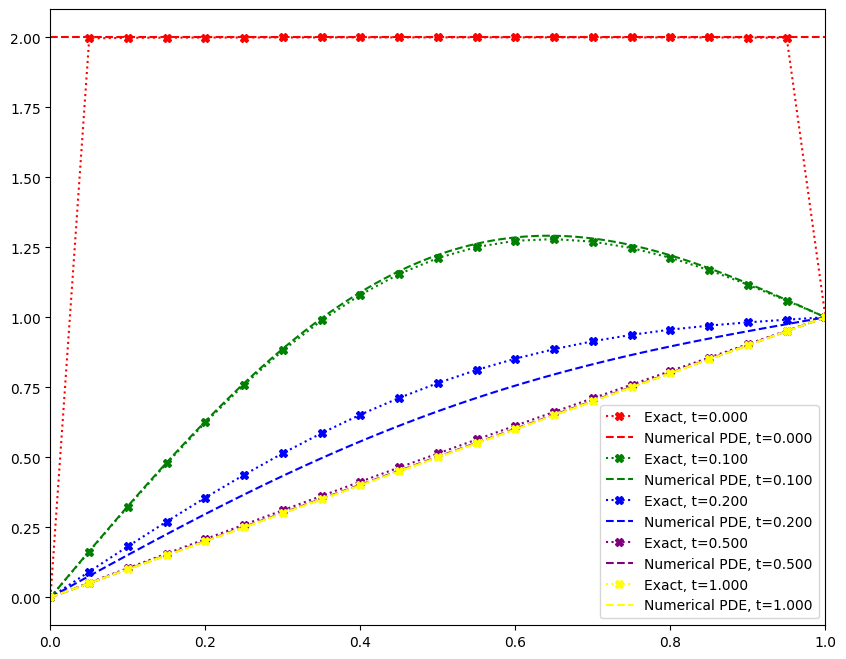

In [6]:
u_old = I(x_pde)

u = np.zeros(Nx_points)
# and to store the full solution
U = np.zeros((Nx_points,Nt_points))
U[:,0] = u_old

for n in range(1, Nt_points):
    
    # set Dirichlet boundary points here
    u[0] = dir0
    u[-1] = dir1
    
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        u[i] = u_old[i] + (dt/(dx**2))*(u[i-1]-2*u[i]+u[i+1])
 
    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[:,n] = u;
    
plotting(U, L)


🚩**Run the script with differing positive values of $\Delta t$. For which values of $\Delta t$ is the scheme stable?** 
(Hint: the condition required for stability is in the form $\Delta t / (\Delta x)^2 \leq C$, for some constant $C > 0$. What is the value of $C$?)


## Backward Euler method for the diffusion equation


In this part, you should try to implement the Backward Euler method for the diffusion equation. This involves replacing the Forward Euler scheme with
\begin{equation}
  \frac{U_m^{n + 1} - U_m^n}{\Delta t} = \frac{U_{m - 1}^{n + 1} - 2 U_m^{n + 1} + U_{m + 1}^{n + 1}}{(\Delta x)^2} \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, n \in \left\{ 0, \ldots, N - 1 \right\}.
\end{equation}

Consider the same initial and boundary condition as previous part as well.


🚩 **Using the script below, complete the backward Euler discretisation of the initial boundary value problem, with $M = 200$, $T = 1$, and $N = 100$.**

In [7]:
import scipy.linalg # library needed for matrices

# intial values
L=1; T=1
Nx_spaces = 200; Nt_gaps = 100; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1
x = np.linspace(0, L, Nx_points)   # mesh points in space
dx = x[1] - x[0]
t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]
C = dt/dx**2
print("dx=",dx,"dt=", dt,"C =",C)

# set up matrices
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)
U = np.zeros((Nx_points,Nt_points))
U_ex = np.zeros((Nx_points, Nt_points))

# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

for i in range(1, Nx_points-1):
   # fill in the values for the non-zero diagonals
    A[i,i] = 1+2*C
    A[i, i+1] = -1*C
    A[i, i-1] = -1*C
    
# set the dirichlet conditions
A[0,0] = 1
A[Nx_points-1,Nx_points-1] = 1


# Set initial condition u(x,0) = I(x)
u_old[:] = I(x[:])

# initialise matrices for storing solutions
U[:,0] = u_old[:]
U_ex[:,0] = U_exact(x,0)

b[0] = dir0
b[-1] = dir1
    
# do timestepping 
for n in range(1, Nt_points):
    # Compute b and solve linear system
    b = I(u_old)
    
    # update u by calculating A_inverse . b
    u_new = np.linalg.solve(A,b)
    # Update u_1 before next step
    u_old = u_new
    U[:,n] = u_new
    U_ex[:,n] = U_exact(x,t[n])

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# set up animation plots
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x,U_ex[:,i])

fig, ax = plt.subplots()
ax.axis([0,1,-0.5,2.5])
l, = ax.plot([],[],':r')
m, = ax.plot([],[],'-.b')
ani = matplotlib.animation.FuncAnimation(fig, animate, interval=100,frames=Nt_points)

from IPython.display import HTML
HTML(ani.to_jshtml())        
#plotting(U)  

## Diffusion Equation Backward Euler and Neumann Boundary Conditions
Now try solving the diffusion equations with the following conditions using Backward Euler and the matrix method above. The matrix will have to be modified for the zero Neumann boundary conditions. This is taken from Q6 in Worksheet 1.
\begin{equation}
 \partial_t u(x,t) = \partial _{xx}u(x,t), x \in (0,1)  \\
 \partial_x u(0,t) =0, \\
 \partial_x u(1,t) = 0, \\
 I(x) = x
\end{equation}


In [ ]:
'''
This script finds a numerical approximation for the solution to
 the following 1D heat equation with Neumann conditions:
   u_t = u_xx  for  x \in (0,1),  t \in (0,T),
   u(x,t=0) = x,
   u'(x=0,t) = 0, u'(x=1,t) = 0,
 using a backward Euler scheme.
''' 
def U_exact2(x,t):
    # fill in the calculation for the exact solution from Q6 on Worksheet 1
    return u_ex

In [ ]:
# perform initial set up for number of points in time and space

# -----------------------------------------
# set up structures to hold U and U_ex2 and interim arrays
u   = ...
u_old = ...
U = ...
U_ex2 = ...

In [ ]:
# Create data structures for the linear system
A = ...
b = ...

# set up the matrix A
# ...

# find the inverse of A and use for all points
Ainv = 

# function for setting the initial condition in space  I(x)
def I2(x):
    return ...

# Set initial condition u(x,0) = I(x)
u_old = I2(x) # no dirichlet boundary conditions in this example

# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]
U_ex2[:,0]=U_exact2(x,0)

#perform time=stepping
#...

In [ ]:
# set up animation plots
